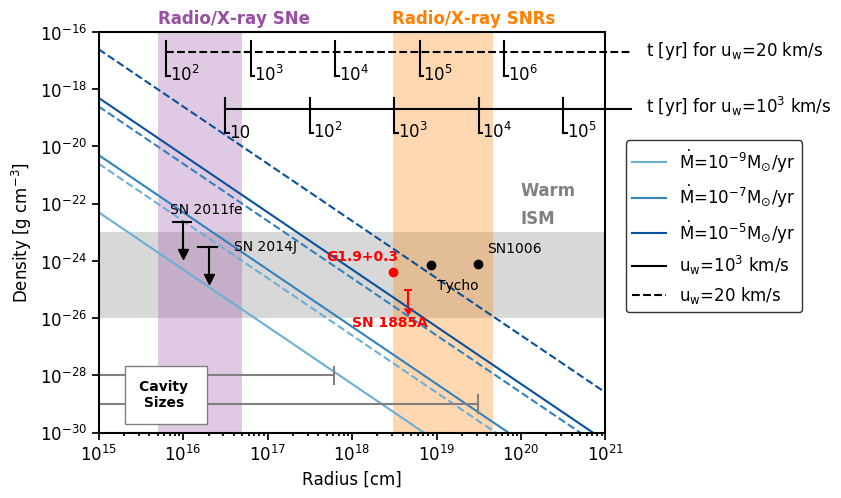

In [4]:
import numpy as np                        ##IMPORTS
import os
import glob
from scipy import misc
from scipy import stats
from scipy import interpolate
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from astropy import constants as const
from astropy.io import fits
from astropy.io import ascii
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

fileext = '/Users/sumits2k/Desktop/Research/SNResearch2/RadioSNRs/SN1885/Sarba2017_SN1885/AASTEX6_Writeup/'

nPoints = 100
radiusArr = 10.0**np.linspace(15,21,nPoints)
msun = 1.99e33
yr = 3.16e7
mdotArrMs = np.array([1e-9,1e-7,1e-5])
mdotArr = mdotArrMs*(msun/yr)
nMdots = len(mdotArr)
kmincm = 1e5
uwArr = np.array([20,1000])*kmincm
nUws = len(uwArr)
rhoArr = np.zeros([nMdots,nUws,nPoints])
for mdot in range(nMdots):
    for uw in range(nUws):
        rhoArr[mdot,uw,:] = (mdotArr[mdot]/uwArr[uw])/(4.0*np.pi*radiusArr**2.0)

rhoton = 2.34e-24 #mu*1.67*10^-24, mu=1.4
pcincm = 3.0857e18
if 1:        
    plt.rcdefaults()
    plt.rcParams.update({'figure.autolayout':'True'})
    plt.rcParams.update({'figure.autolayout':'True'})
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'mathtext.fontset':'stixsans'})
    plt.rcParams.update({'mathtext.default':'regular'})
    plt.rcParams.update({'axes.linewidth': 1.5})
    plt.rcParams.update({'xtick.major.size': 5})
    plt.rcParams.update({'xtick.major.width': 1.25 })
    plt.rcParams.update({'xtick.minor.size': 2.5})
    plt.rcParams.update({'xtick.minor.width': 1.25 })
    plt.rcParams.update({'ytick.major.size': 5})
    plt.rcParams.update({'ytick.major.width': 1.25 })
    plt.rcParams.update({'ytick.minor.size': 2.5})
    plt.rcParams.update({'ytick.minor.width': 1.25 })
    
plotFileName = 'SNR_Rrho.pdf'
plt.figure(1,figsize = [6.5, 5])
plt.clf()
colorArr = ['#6baed6', '#3182bd', '#08519c']
styleArr = ['--', '-']

ageArr = 10.0**np.linspace(1,6,6)
ageArrStr = ['10','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
nAges = len(ageArr)
radArrSlow = uwArr[0]*(ageArr*yr)
radArrFast = uwArr[1]*(ageArr*yr)

lastAgeFast = nAges-2

mdotStrArr = ['10$^{-9}$','10$^{-7}$','10$^{-5}$']
ax = plt.gca()
ax.set_xlabel('Radius [cm]')
ax.set_ylabel('Density [g cm$^{-3}$]')
ax.set_yscale('log')
ax.set_ylim(1e-30,1e-16)
ax.set_yticks([1e-30,1e-28,1e-26,1e-24,1e-22,1e-20,1e-18,1e-16])
ax.set_xscale('log')
ax.set_xlim(1e15,1e21)
ax.fill_between(radiusArr,1e-26,1e-23,facecolor='grey',alpha=0.3)
ax.fill_between([5e15,5e16],[1e-30,1e-30],[1e-16,1e-16],facecolor='#984ea3', alpha=0.3)
ax.fill_between([1.0*pcincm,15.0*pcincm],[1e-30,1e-30],[1e-16,1e-16],facecolor='#ff7f00', alpha=0.3)
ax.text(5e15,2e-16,'Radio/X-ray SNe',fontsize = 12, weight='bold', color='#984ea3')
ax.text(3e18,2e-16,'Radio/X-ray SNRs',fontsize = 12, weight='bold', color='#ff7f00')
ax.text(1e20,2e-22,'Warm',fontsize = 12,color='grey', weight='bold')
ax.text(1e20,2e-23,'ISM',fontsize = 12,color='grey', weight='bold')

ax.plot([radArrSlow[1],2e21],[2e-17,2e-17],color='k',linestyle='--',clip_on=False,linewidth=1.5)
ax.text(3e21,1.5e-17,'t [yr] for u$_w$=20 km/s',fontsize=12,color='k')
for age in range(1,nAges) :
    ax.plot([radArrSlow[age],radArrSlow[age]],[3e-18,5e-17],color='k',linewidth=1.5)
    ax.plot([radArrSlow[age],1.1*radArrSlow[age]],[3e-18,3e-18],color='k',linewidth=1.5)
    ax.text(1.1*radArrSlow[age],2e-18,ageArrStr[age],fontsize=12)

ax.plot([radArrFast[0],2e21],[2e-19,2e-19],color='k',clip_on=False,linewidth=1.5)
ax.text(3e21,1.5e-19,'t [yr] for u$_w$=10$^3$ km/s',fontsize=12,color='k')
for age in range(0,lastAgeFast+1) :
    ax.plot([radArrFast[age],radArrFast[age]],[3e-20,5e-19],color='k',linewidth=1.5)
    ax.plot([radArrFast[age],1.1*radArrFast[age]],[3e-20,3e-20],color='k',linewidth=1.5)
    ax.text(1.1*radArrFast[age],2e-20,ageArrStr[age],fontsize=12)

    
mdotStrArr = ['10$^{-9}$','10$^{-7}$','10$^{-5}$']
for mdot in range(nMdots):
    for uw in range(nUws):
        if uw == 1 : labelStr = '$\dot{M}$='+mdotStrArr[mdot]+'M$_{\odot}$/yr'
        else : labelStr = ''  
        ax.plot(radiusArr,rhoArr[mdot,uw,:],color = colorArr[mdot], linestyle = styleArr[uw], label=labelStr,linewidth=1.5)

ax.plot(1e19,1e17,color='k',label='u$_{w}$=10$^{3}$ km/s',linewidth=1.5)
ax.plot(1e19,1e17,color='k',linestyle='--',label='u$_{w}$=20 km/s',linewidth=1.5)
        
ax.plot([0.75*1e16,1.25*1e16], [10.0*rhoton,10.0*rhoton],color='k',linewidth=1.5)
ax.plot([1e16,1e16], [10.0*rhoton,0.75*rhoton],color='k',linewidth=1.5)
ax.plot([1e16], [0.75*rhoton],'v',mfc='k',mec='k', ms=7,linewidth=1.5)
ax.text(7e15, 20.0*rhoton, 'SN 2011fe', fontsize = 10)


ax.plot([2.0*0.75*1e16,2.0*1.25*1e16], [1.3*rhoton,1.3*rhoton],color='k',linewidth=1.5)
ax.plot([2e16,2e16], [1.3*rhoton,0.075*1.3*rhoton],color='k',linewidth=1.5)
ax.plot([2e16], [0.075*1.3*rhoton],'v',mfc='k',mec='k', ms=7,linewidth=1.5)
ax.text(4e16, 1.0*rhoton, 'SN 2014J', fontsize = 10)
## axArr[1,0].arrow(1e16, 10.0*rhoton, 0.0, -10.0*rhoton
##                  , fc='blue', ec='black', head_width = 0.4*1e16, head_length = 0.04*1e-20)

sn1006n = 0.5*(0.25+0.4)
sn1006nErr = 0.4-sn1006n
ax.errorbar([10.0*pcincm], [sn1006n*rhoton]
                    , xerr = [0.1*10.0*pcincm]
                    , yerr = [sn1006nErr*rhoton]
                    , capsize = 0, ecolor = 'k', marker = 'o', mfc='k', mec='k', ms=6, mew = 1.0)
ax.text(4e19,2e-24, 'SN1006', fontsize = 10)

tychon = 0.3
tychonErr = 0.1
ax.errorbar([2.8*pcincm], [tychon*rhoton]
                    , xerr = [0.1*2.8*pcincm]
                    , yerr = [tychonErr*rhoton]
                    , capsize = 0, ecolor = 'k', marker = 'o', mfc='k', mec='k', ms=6, mew = 1.0)
ax.text(1e19,1e-25, 'Tycho', fontsize = 10)

g19n = 0.18
g19nErr = 0.05
ax.errorbar([1.0*pcincm], [g19n*rhoton]
                    , xerr = [0.1*pcincm]
                    , yerr = [0.]
                    , capsize = 0, ecolor = 'r', marker = 'o', mfc='r', mec='r', ms=6, mew = 1.0)
ax.text(5e17,1e-24, 'G1.9+0.3', fontsize = 10, color='r', weight='bold')

SN1885A_n = 0.04  #cm^-3
radSN1885A = 1.5 #pc
ax.errorbar([radSN1885A*pcincm], [SN1885A_n*rhoton]
                    , xerr = [0.15*pcincm]
                    , yerr = [0.03*rhoton]
                    , capsize = 0, ecolor = 'r', uplims=True, mfc='r', mec='r', ms=7, mew = 1.0)

ax.text(1.0e18,5.0e-27, 'SN 1885A', fontsize = 10, color='r', weight='bold')

ax.plot([1e15,0.2*pcincm],[1e-28,1e-28],color='grey',linewidth=1.5)
ax.plot([0.2*pcincm,0.2*pcincm],[2e-28,5e-29],color='grey',linewidth=1.5)
ax.plot([1e15,10*pcincm],[1e-29,1e-29],color='grey',linewidth=1.5)
ax.plot([10*pcincm,10*pcincm],[2e-29,5e-30],color='grey',linewidth=1.5)
ax.text(3e15,8e-30,'Cavity \n Sizes', weight='bold', fontsize='small',bbox=dict(facecolor='white', edgecolor='gray', pad=10.0))


ax.legend(loc=(1.04,0.3),fontsize=12, edgecolor='inherit')
#axArr[0,0].legend(['u','v'],loc='lower left',fontsize=8)
plt.tight_layout()
plt.savefig(fileext+'SNR_Rho_Radius.pdf', bbox_inches='tight', dpi=100)
plt.show()



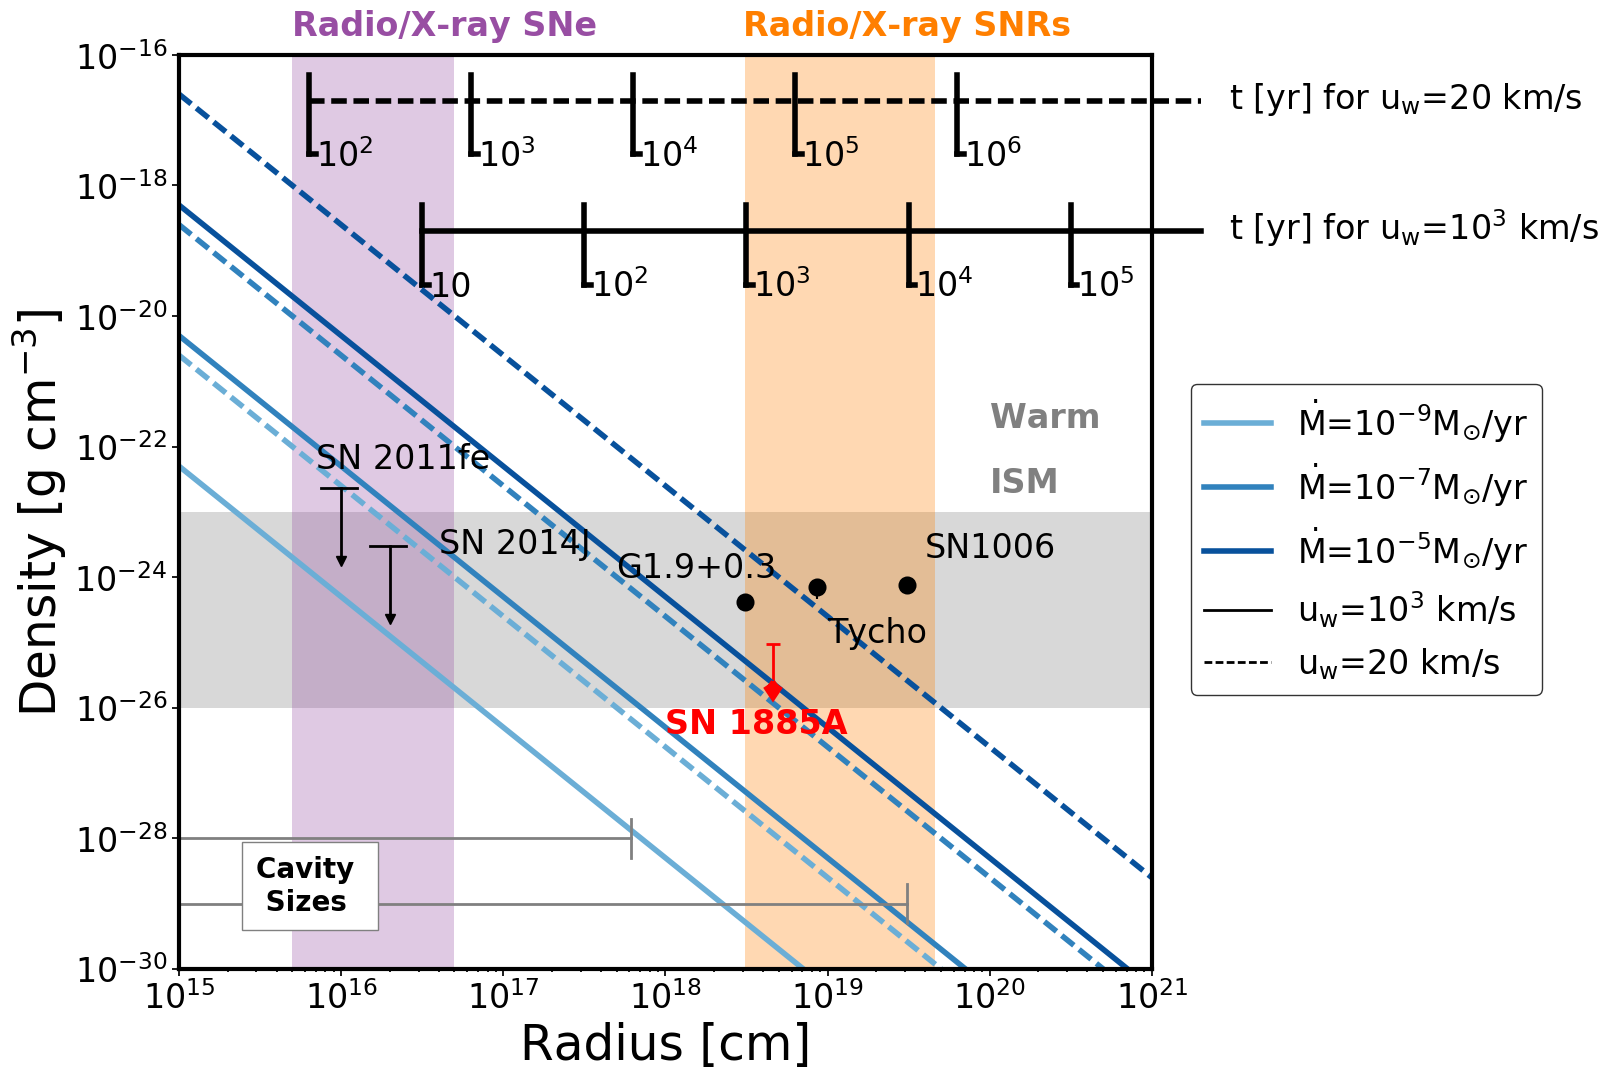

In [25]:
fileext = '/Users/sumits2k/Desktop/TALKS/ngVLA_Poster/'

nPoints = 100
radiusArr = 10.0**np.linspace(15,21,nPoints)
msun = 1.99e33
yr = 3.16e7
mdotArrMs = np.array([1e-9,1e-7,1e-5])
mdotArr = mdotArrMs*(msun/yr)
nMdots = len(mdotArr)
kmincm = 1e5
uwArr = np.array([20,1000])*kmincm
nUws = len(uwArr)
rhoArr = np.zeros([nMdots,nUws,nPoints])
for mdot in range(nMdots):
    for uw in range(nUws):
        rhoArr[mdot,uw,:] = (mdotArr[mdot]/uwArr[uw])/(4.0*np.pi*radiusArr**2.0)

rhoton = 2.34e-24 #mu*1.67*10^-24, mu=1.4
pcincm = 3.0857e18
if 1:        
    plt.rcdefaults()
    plt.rcParams.update({'figure.autolayout':'True'})
    plt.rcParams.update({'figure.autolayout':'True'})
    plt.rcParams.update({'font.size': 24})
    plt.rcParams.update({'mathtext.fontset':'stixsans'})
    plt.rcParams.update({'mathtext.default':'regular'})
    plt.rcParams.update({'axes.linewidth': 3.0})
    plt.rcParams.update({'xtick.major.size': 5})
    plt.rcParams.update({'xtick.major.width': 1.25 })
    plt.rcParams.update({'xtick.minor.size': 2.5})
    plt.rcParams.update({'xtick.minor.width': 1.25 })
    plt.rcParams.update({'ytick.major.size': 5})
    plt.rcParams.update({'ytick.major.width': 1.25 })
    plt.rcParams.update({'ytick.minor.size': 2.5})
    plt.rcParams.update({'ytick.minor.width': 1.25 })
    
plotFileName = 'SNR_Rrho.pdf'
plt.figure(1,figsize = [12.5, 11])
plt.clf()
colorArr = ['#6baed6', '#3182bd', '#08519c']
styleArr = ['--', '-']

ageArr = 10.0**np.linspace(1,6,6)
ageArrStr = ['10','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
nAges = len(ageArr)
radArrSlow = uwArr[0]*(ageArr*yr)
radArrFast = uwArr[1]*(ageArr*yr)

lastAgeFast = nAges-2

mdotStrArr = ['10$^{-9}$','10$^{-7}$','10$^{-5}$']
ax = plt.gca()
ax.set_xlabel('Radius [cm]', fontsize=35)
ax.set_ylabel('Density [g cm$^{-3}$]', fontsize=35)
ax.set_yscale('log')
ax.set_ylim(1e-30,1e-16)
ax.set_yticks([1e-30,1e-28,1e-26,1e-24,1e-22,1e-20,1e-18,1e-16])
ax.set_xscale('log')
ax.set_xlim(1e15,1e21)
ax.fill_between(radiusArr,1e-26,1e-23,facecolor='grey',alpha=0.3)
ax.fill_between([5e15,5e16],[1e-30,1e-30],[1e-16,1e-16],facecolor='#984ea3', alpha=0.3)
ax.fill_between([1.0*pcincm,15.0*pcincm],[1e-30,1e-30],[1e-16,1e-16],facecolor='#ff7f00', alpha=0.3)
ax.text(5e15,2e-16,'Radio/X-ray SNe', weight='bold', color='#984ea3')
ax.text(3e18,2e-16,'Radio/X-ray SNRs',weight='bold', color='#ff7f00')
ax.text(1e20,2e-22,'Warm',color='grey', weight='bold')
ax.text(1e20,2e-23,'ISM',color='grey', weight='bold')

ax.plot([radArrSlow[1],2e21],[2e-17,2e-17],color='k',linestyle='--',clip_on=False,linewidth=4.0)
ax.text(3e21,1.5e-17,'t [yr] for u$_w$=20 km/s',color='k')
for age in range(1,nAges) :
    ax.plot([radArrSlow[age],radArrSlow[age]],[3e-18,5e-17],color='k',linewidth=4.0)
    ax.plot([radArrSlow[age],1.1*radArrSlow[age]],[3e-18,3e-18],color='k',linewidth=4.0)
    ax.text(1.1*radArrSlow[age],2e-18,ageArrStr[age])

ax.plot([radArrFast[0],2e21],[2e-19,2e-19],color='k',clip_on=False,linewidth=4.0)
ax.text(3e21,1.5e-19,'t [yr] for u$_w$=10$^3$ km/s',color='k')
for age in range(0,lastAgeFast+1) :
    ax.plot([radArrFast[age],radArrFast[age]],[3e-20,5e-19],color='k',linewidth=4.0)
    ax.plot([radArrFast[age],1.1*radArrFast[age]],[3e-20,3e-20],color='k',linewidth=4.0)
    ax.text(1.1*radArrFast[age],2e-20,ageArrStr[age])

    
mdotStrArr = ['10$^{-9}$','10$^{-7}$','10$^{-5}$']
for mdot in range(nMdots):
    for uw in range(nUws):
        if uw == 1 : labelStr = '$\dot{M}$='+mdotStrArr[mdot]+'M$_{\odot}$/yr'
        else : labelStr = ''  
        ax.plot(radiusArr,rhoArr[mdot,uw,:],color = colorArr[mdot], linestyle = styleArr[uw], label=labelStr,linewidth=4.0)

ax.plot(1e19,1e17,color='k',label='u$_{w}$=10$^{3}$ km/s',linewidth=2.0)
ax.plot(1e19,1e17,color='k',linestyle='--',label='u$_{w}$=20 km/s',linewidth=2.0)
        
ax.plot([0.75*1e16,1.25*1e16], [10.0*rhoton,10.0*rhoton],color='k',linewidth=2.0)
ax.plot([1e16,1e16], [10.0*rhoton,0.75*rhoton],color='k',linewidth=2.0)
ax.plot([1e16], [0.75*rhoton],'v',mfc='k',mec='k', ms=7,linewidth=2.0)
ax.text(7e15, 20.0*rhoton, 'SN 2011fe')


ax.plot([2.0*0.75*1e16,2.0*1.25*1e16], [1.3*rhoton,1.3*rhoton],color='k',linewidth=2.0)
ax.plot([2e16,2e16], [1.3*rhoton,0.075*1.3*rhoton],color='k',linewidth=2.0)
ax.plot([2e16], [0.075*1.3*rhoton],'v',mfc='k',mec='k', ms=7,linewidth=2.0)
ax.text(4e16, 1.0*rhoton, 'SN 2014J')
## axArr[1,0].arrow(1e16, 10.0*rhoton, 0.0, -10.0*rhoton
##                  , fc='blue', ec='black', head_width = 0.4*1e16, head_length = 0.04*1e-20)

sn1006n = 0.5*(0.25+0.4)
sn1006nErr = 0.4-sn1006n
ax.errorbar([10.0*pcincm], [sn1006n*rhoton]
                    , xerr = [0.1*10.0*pcincm]
                    , yerr = [sn1006nErr*rhoton]
                    , capsize = 0, ecolor = 'k', marker = 'o', mfc='k', mec='k', ms=10, mew = 3.0)
ax.text(4e19,2e-24, 'SN1006')

tychon = 0.3
tychonErr = 0.1
ax.errorbar([2.8*pcincm], [tychon*rhoton]
                    , xerr = [0.1*2.8*pcincm]
                    , yerr = [tychonErr*rhoton]
                    , capsize = 0, ecolor = 'k', marker = 'o', mfc='k', mec='k', ms=10, mew = 3.0)
ax.text(1e19,1e-25, 'Tycho')

g19n = 0.18
g19nErr = 0.05
ax.errorbar([1.0*pcincm], [g19n*rhoton]
                    , xerr = [0.1*pcincm]
                    , yerr = [0.]
                    , capsize = 0, ecolor = 'r', marker = 'o', mfc='k', mec='k', ms=10, mew = 3.0)
ax.text(5e17,1e-24, 'G1.9+0.3', color='k')

SN1885A_n = 0.04  #cm^-3
radSN1885A = 1.5 #pc
ax.errorbar([radSN1885A*pcincm], [SN1885A_n*rhoton]
                    , xerr = [0.15*pcincm]
                    , yerr = [0.03*rhoton]
                    , ecolor = 'r', uplims=True, mfc='r', mec='r', elinewidth=2.0, ms=90, mew = 10.0)

ax.text(1.0e18,4.0e-27, 'SN 1885A', color='r', weight='bold')

ax.plot([1e15,0.2*pcincm],[1e-28,1e-28],color='grey',linewidth=2.0)
ax.plot([0.2*pcincm,0.2*pcincm],[2e-28,5e-29],color='grey',linewidth=2.0)
ax.plot([1e15,10*pcincm],[1e-29,1e-29],color='grey',linewidth=2.0)
ax.plot([10*pcincm,10*pcincm],[2e-29,5e-30],color='grey',linewidth=2.0)
ax.text(3e15,8e-30,'Cavity \n Sizes', weight='bold', fontsize='small',bbox=dict(facecolor='white', edgecolor='gray', pad=10.0))


ax.legend(loc=(1.04,0.3), edgecolor='inherit')
#axArr[0,0].legend(['u','v'],loc='lower left',fontsize=8)
plt.tight_layout()
plt.savefig(fileext+'SNR_Rho_Radius_Present.pdf', bbox_inches='tight', dpi=180)
plt.show()

